In [ ]:
# Dataset

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.colors as pc


In [29]:
# Load the CSV file

df = pd.read_csv("data_file/vestiaire_smaller.csv")

# Inspect the contents and structure of DataFrame. Display the first 5 rows
df.head(5)



,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Women,Women Clothing,Autumn / Winter,Never worn,34,True,Miu Miu,Wool,Grey,272.92,223.65,216.94,NaN,25775970,Germany,3,14
1,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Women,Women Clothing,Autumn / Winter,Very good condition,2,True,Dior,Wool,Grey,437.97,358.91,312.25,NaN,2709130,Italy,172,6
2,43246087,Silk maxi dress,Silk maxi dress La Perla Black size 44 IT in S...,Women,Women Clothing,All seasons,"Never worn, with tag",4,True,La Perla,Silk,Black,444.74,370.62,322.44,NaN,6048767,Germany,5,15
3,43244097,Trousers,Trousers Gucci Beige size M International in C...,Women,Women Clothing,All seasons,Very good condition,4,True,Gucci,Cotton,Beige,145.75,119.44,103.91,NaN,10050555,Spain,11,15
4,43246432,Lingerie set,Lingerie set Agent Provocateur Black in Polyam...,Women,Women Clothing,All seasons,Very good condition,0,True,Agent Provocateur,Polyamide,Black,55.37,46.14,42.40,NaN,5594414,United Kingdom,47,13


In [30]:
# Display the last 5 rows

df.tail(5)

,product_id,product_type,product_name,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_country,seller_products_sold,seller_num_products_listed
13731,41542694,Heels,Heels Prada Brown size 37 IT in Suede,Women,Women Shoes,All seasons,Good condition,7,True,Prada,Suede,Brown,29.16,24.30,10.07,NaN,22898175,Switzerland,179,44
13732,41540056,Simple pump patent leather heels,Simple pump patent leather heels Christian Lou...,Women,Women Shoes,All seasons,Very good condition,3,True,Christian Louboutin,Patent leather,Black,332.28,276.90,276.90,NaN,16266013,France,1,0
13733,41503237,Tweed trainers,Tweed trainers Chanel Black size 39 EU in Tweed,Women,Women Shoes,All seasons,Never worn,24,True,Chanel,Tweed,Black,447.90,373.25,324.73,NaN,3180346,Italy,11,1
13734,41540832,Leather heels,Leather heels Pollini Black size 38 IT in Leat...,Women,Women Shoes,All seasons,Never worn,2,True,Pollini,Leather,Black,51.12,42.60,28.76,NaN,19750106,Italy,62,184
13735,41540732,Leather heels,Leather heels Ninamounah Black size 39 EU in L...,Women,Women Shoes,All seasons,Very good condition,21,True,Ninamounah,Leather,Black,97.13,80.94,80.94,NaN,5992355,Estonia,1,1


In [31]:
df.shape

# The data has 900514 rows and 36 columns

(13736, 20)

In [ ]:
# Data Preparation and cleaning

In [52]:
# Copying the df files to avoid unintended modifications of the original file

df_new = df.copy()

# Identify the number of records in the Dataframe, and compare it with the number of rows in the original file. 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13736 entries, 0 to 13735
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  13736 non-null  int64  
 1   product_type                13736 non-null  object 
 2   product_name                13736 non-null  object 
 3   product_gender_target       13736 non-null  object 
 4   product_category            13727 non-null  object 
 5   product_season              13736 non-null  object 
 6   product_condition           13736 non-null  object 
 7   product_like_count          13736 non-null  int64  
 8   sold                        13736 non-null  bool   
 9   brand_name                  13736 non-null  object 
 10  product_material            13736 non-null  object 
 11  product_color               13736 non-null  object 
 12  price_usd                   13736 non-null  float64
 13  seller_price                137

In [33]:
df_new.columns

Index(['product_id', 'product_type', 'product_name', 'product_gender_target',
       'product_category', 'product_season', 'product_condition',
       'product_like_count', 'sold', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'buyers_fees', 'seller_id', 'seller_country', 'seller_products_sold',
       'seller_num_products_listed'],
      dtype='object')

In [53]:
# Identify null records to calculate the percentage of missing values in each columns

df_new.isna().mean()* 100

product_id                      0.000000
product_type                    0.000000
product_name                    0.000000
product_gender_target           0.000000
product_category                0.065521
product_season                  0.000000
product_condition               0.000000
product_like_count              0.000000
sold                            0.000000
brand_name                      0.000000
product_material                0.000000
product_color                   0.000000
price_usd                       0.000000
seller_price                    0.000000
seller_earning                  0.000000
buyers_fees                   100.000000
seller_id                       0.000000
seller_country                  0.000000
seller_products_sold            0.000000
seller_num_products_listed      0.000000
dtype: float64

In [ ]:
## Exploratory Data Analysis (EDA)

In [59]:
# Seller by Country

# List all unique seller countries
seller_countries = df['seller_country'].unique()

# Display the list of seller countries
print("List of Seller Countries:")
print(seller_countries)

List of Seller Countries:
['Germany' 'Italy' 'Spain' 'United Kingdom' 'Netherlands' 'France'
 'Austria' 'Ireland' 'Croatia' 'Sweden' 'United States' 'Denmark' 'Monaco'
 'Bulgaria' 'Belgium' 'Cyprus' 'Finland' 'Poland' 'Australia' 'Romania'
 'Hungary' 'Lithuania' 'Greece' 'Hong Kong' 'Singapore' 'Latvia'
 'Luxembourg' 'Canada' 'United Arab Emirates' 'Portugal' 'Estonia'
 'Switzerland' 'Slovenia' 'Slovakia' 'Philippines' 'Kazakhstan'
 'Czech Republic' 'South Korea' 'Malaysia' 'China' 'Japan' 'Malta'
 'Lebanon' 'Qatar' 'Israel' 'Indonesia' 'Bahrain' 'Norway' 'Turkey'
 'Saudi Arabia' 'New Zealand']


In [61]:
## Find the country with top sold items

# Group by country and sum the items sold
country_sales = df_new.groupby('seller_country')['sold'].sum().sort_values(ascending=False)

print(f'Top Country with most items sold : {country_sales.index[0]}')


Top Country with most items sold : Italy


In [99]:
Italy_products = df_new.loc[df_new['seller_country']=='Italy']

Italy_top_products_sold = Italy_products.groupby('product_category').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Italy_top_products_sold = Italy_products.groupby(df_new['product_category']).count().sort_values(by='product_id', ascending=False)

Italy_top_products_sold

# Woman Clothing is the Top products sold by Italy





,product_category,count
4,Women Clothing,923
5,Women Shoes,867
1,Men Clothing,840
2,Men Shoes,482
0,Men Accessories,321
3,Women Accessories,163


In [103]:
Italy_products = df_new.loc[(df_new['seller_country'] == 'Italy') & (df_new['sold'] == True)]

# Calculate the total earnings
total_earnings_Italy = Italy_products['seller_earning'].sum()

# Display the total earnings
print(f"Total earnings by Italy from sold products: ${total_earnings_Italy:.2f}")

Total earnings by Italy from sold products: $529705.89


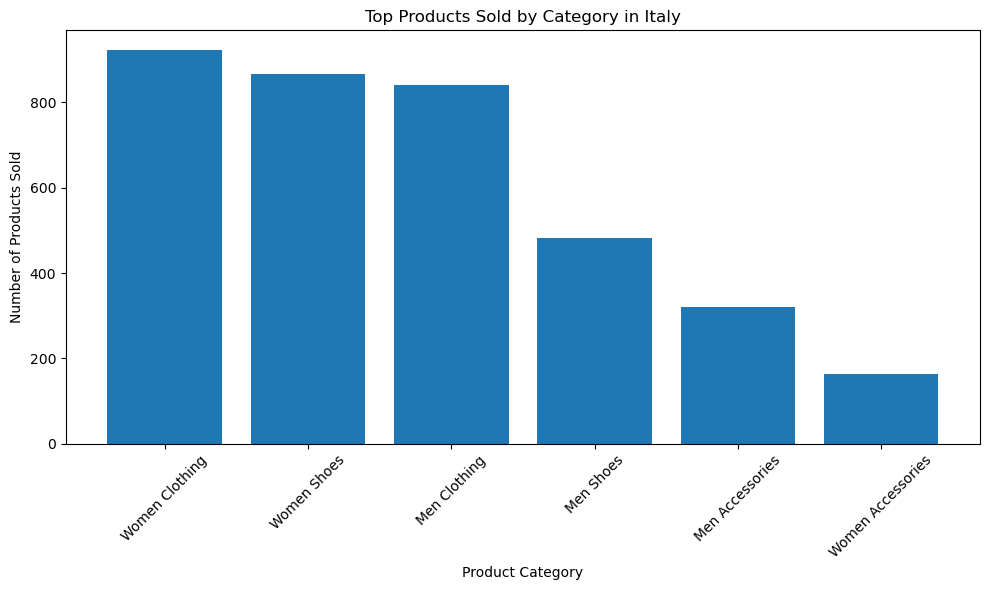

In [100]:
# Plot the results using matplotlib

plt.figure(figsize=(10, 6))
plt.bar(Italy_top_products_sold['product_category'], Italy_top_products_sold['count'])
plt.xticks(rotation=45)  
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.title('Top Products Sold by Category in Italy')
plt.tight_layout()  
plt.show()

In [95]:
US_products = df_new.loc[df_new['seller_country']=='United States']

US_top_products_sold = US_products.groupby('product_category').size().reset_index(name='count').sort_values(by='count', ascending=False)

US_top_products_sold



,product_category,count
5,Women Shoes,380
4,Women Clothing,209
2,Men Shoes,123
1,Men Clothing,101
0,Men Accessories,76
3,Women Accessories,75


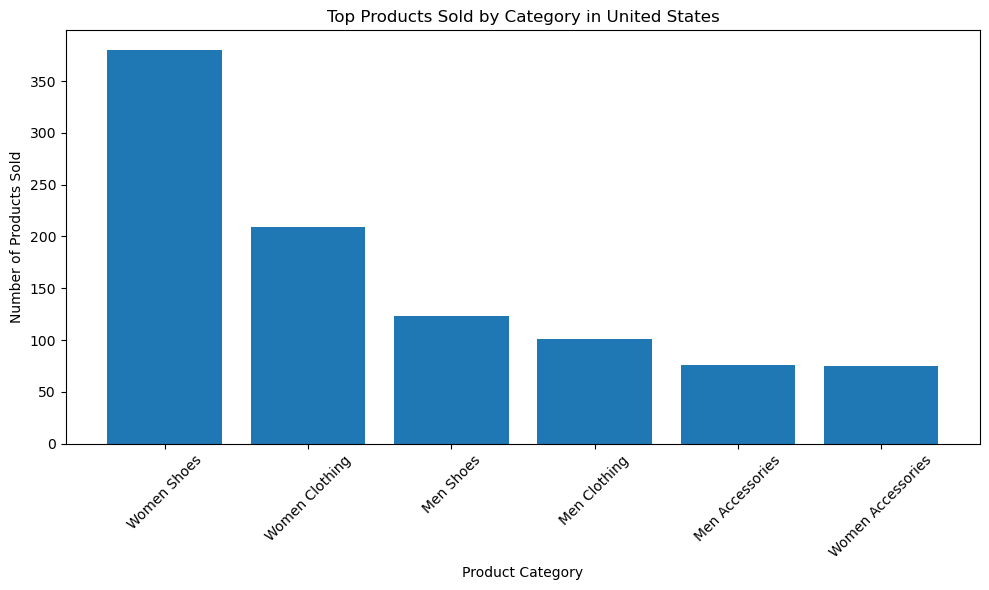

In [113]:
# Plot the results using matplotlib

plt.figure(figsize=(10, 6))
plt.bar(US_top_products_sold['product_category'], US_top_products_sold['count'])
plt.xticks(rotation=45) 
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.title('Top Products Sold by Category in United States')
plt.tight_layout()  
plt.show()

In [108]:
sold_products = df_new[df_new['sold'] == True]

# Group by seller country and sum the seller earnings
earnings_by_country = sold_products.groupby('seller_country')['seller_earning'].sum().reset_index()

# Rename the columns for better readability
earnings_by_country.columns = ['Country', 'Total Earnings']

# Sort the results by total earnings in descending order
earnings_by_country = earnings_by_country.sort_values(by='Total Earnings', ascending=False)

# Display the resulting DataFrame
print(earnings_by_country)


                 Country  Total Earnings
21                 Italy       529705.89
13                France       475620.19
50         United States       268092.09
49        United Kingdom       267754.03
14               Germany       182229.15
44                 Spain       103395.97
35                Poland        51005.34
16             Hong Kong        43973.27
38               Romania        43404.85
3                Belgium        36987.27
31           Netherlands        34244.99
15                Greece        32935.99
1                Austria        31773.01
45                Sweden        29929.06
4               Bulgaria        28767.13
36              Portugal        25218.11
0              Australia        25091.17
10               Denmark        20847.09
19               Ireland        15775.27
26             Lithuania        14870.55
12               Finland        12185.14
46           Switzerland        11523.04
9         Czech Republic        11062.98
7               

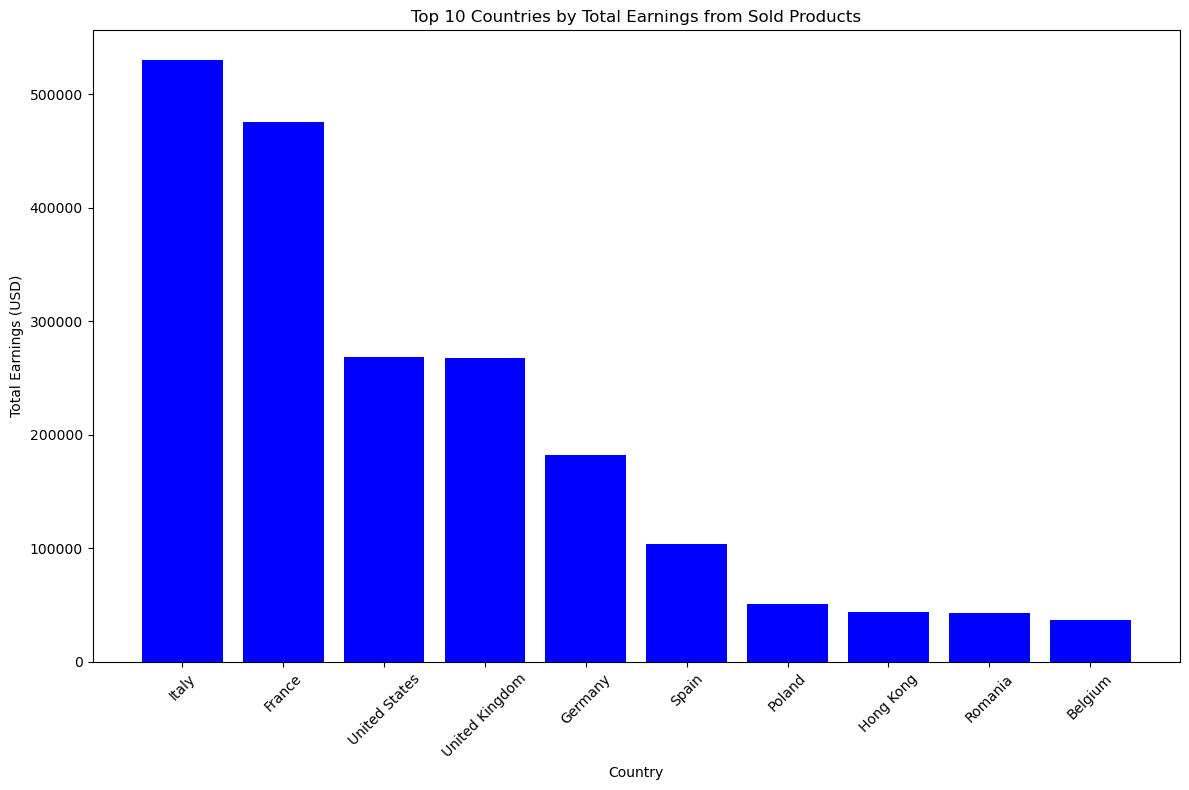

In [109]:
# Select the top 10 countries
top_10_countries = earnings_by_country.head(10)

# Plot the top 10 countries by earnings
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries['Country'], top_10_countries['Total Earnings'], color='blue')
plt.xlabel('Country')
plt.ylabel('Total Earnings (USD)')
plt.title('Top 10 Countries by Total Earnings from Sold Products')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better fit
plt.show()